# Unsupervised Machine Learning på kunddata

## Vanliga metoder i Unsupervised Learning

### Klustring
En vanlig metod inom Unsupervised Learning är klustring, där modellen grupperar data i kluster baserat på likheter. K-means, Hierarkisk klustring.

*Exempel:* Klustring kan användas för att segmentera kunder i olika grupper baserat på deras köpvanor utan att veta något om deras tidigare beteenden.

### Dimensionsreduktion
En annan viktig metod är dimensionsreduktion, som minskar komplexiteten i data genom att reducera antalet variabler (dimensioner) medan så mycket information som möjligt bevaras. 

*Exempel:* PCA (Principal Component Analysis), UMAP (Uniform Manifold Approximation and Projection).

### Anomalidetektion
Unsupervised Learning används också för att upptäcka avvikelser eller anomalier i data, som kan indikera ovanliga händelser eller bedrägliga aktiviteter.

*Exempel:* Anomalidetektion i nätverkstrafik för att upptäcka potentiella cyberattacker.


In [51]:
import pandas as pd

df = pd.read_csv('marketing_campaign_cleaned.csv')
df.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,age,children
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,4044,66,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,3494,69,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,3693,58,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,3520,39,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,3542,42,1


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_df = df.select_dtypes(include='number')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['cluster'] = clusters


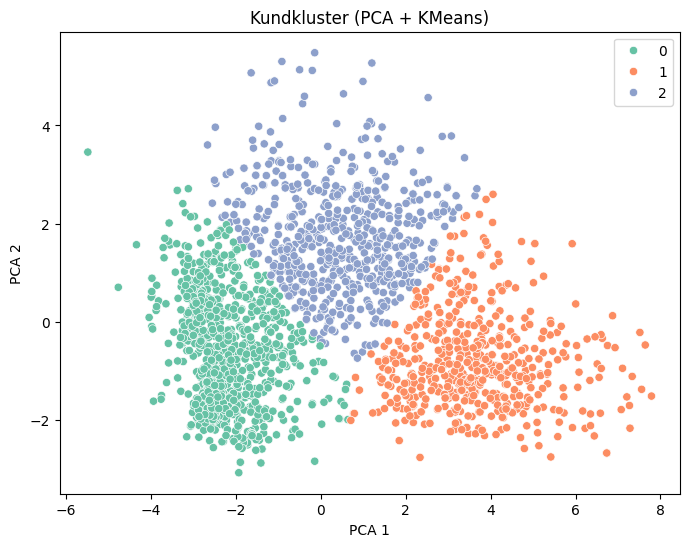

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Kundkluster (PCA + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [55]:
df.groupby("cluster").mean(numeric_only=True)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,age,children
cluster,,,,,,,,,,,,,,,,,,,,,
0,35068.651794,0.781765,0.439379,49.146460,42.335597,5.035887,23.896217,7.440349,5.281280,15.379243,...,0.071775,0.009699,0.000000,0.000970,0.001940,0.012609,0.086324,3698.672163,51.319108,1.221145
1,77351.472924,0.032491,0.111913,49.146209,611.474729,66.781588,456.043321,99.120939,69.574007,76.350181,...,0.086643,0.129964,0.274368,0.218412,0.034296,0.003610,0.299639,3730.003610,54.351986,0.144404
2,58274.822504,0.245642,0.958796,48.676704,465.416799,25.698891,147.033281,32.996830,25.209192,62.239303,...,0.064976,0.129952,0.015848,0.031696,0.014263,0.009509,0.123613,3797.061807,58.702060,1.204437


## 📈 Slutsats och affärsrekommendation

Genom att tillämpa PCA och KMeans på marketing-datasetet har vi lyckats identifiera tre tydliga kundsegment. Dessa kluster skiljer sig åt både i köpkraft, köpmönster och hur de svarar på kampanjer.

**Vad betyder detta för affärsstrategin?**

- 📣 **Personlig kommunikation:**  
  Företaget kan skapa riktade kampanjer som matchar varje klusters profil. Premiumkunder (Kluster 1) kan få exklusiva erbjudanden, medan Kluster 0 bör få rabatterade familjeerbjudanden.

- 💡 **Effektiv budgetanvändning:**  
  Genom att fokusera marknadsföringsresurser där de ger bäst effekt – t.ex. premiumkunder som svarar bäst – kan ROI förbättras.

- 🧩 **Kanaloptimering:**  
  Kluster 2 handlar ofta via katalog. Dessa kunder kan stegvis introduceras till digitala kanaler genom e-post eller webbkampanjer.

- 📊 **Datadrivet beslutsfattande:**  
  Denna typ av analys kan upprepas över tid för att se hur kundgrupper förändras, t.ex. efter nya kampanjer eller produktlanseringar.

---

👉 **Sammanfattning:**  
Segmentering med unsupervised learning ger värdefulla insikter även utan fördefinierade målvariabler. Det är ett kraftfullt verktyg för att förstå kunder, förbättra kampanjer och driva affärsresultat.

### Extra analys: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN är en klustringsalgoritm som grupperar punkter baserat på densitet snarare än avstånd till ett medelvärde (som i KMeans).

**Fördelar:**
- Kräver inte att man specificerar antal kluster i förväg
- Identifierar "brus" eller outliers automatiskt
- Passar bättre för kluster av oregelbunden form

**Parametrar:**
- `eps`: maxavstånd mellan två punkter för att räknas till samma kluster
- `min_samples`: minsta antal punkter för att bilda ett tätt kluster


In [56]:
from sklearn.cluster import DBSCAN

# Vi använder samma PCA-reducerade data (X_pca)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca)

# Lägg till i dataframe
df['dbscan_cluster'] = dbscan_clusters


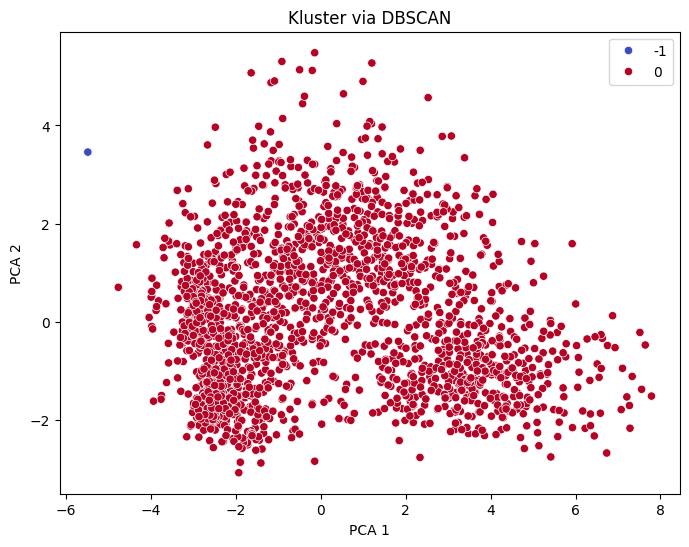

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_clusters, palette='coolwarm')
plt.title("Kluster via DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## 🧪 Extra analys: DBSCAN-klustring

Vi testade även DBSCAN (Density-Based Spatial Clustering of Applications with Noise) som ett alternativ till KMeans.

🔹 **DBSCAN identifierar kluster baserat på täthet**, vilket innebär att det kan:
- Hitta kluster av olika form och storlek
- Identifiera "brus"/outliers som inte tillhör något kluster

📌 I denna analys använde vi:
- `eps = 1.5` (maxavstånd mellan två punkter i samma kluster)
- `min_samples = 5` (minsta antal punkter för att bilda ett kluster)

DBSCAN visade att vissa datapunkter inte tillhörde något tydligt kluster, vilket antyder att det finns kunder med **avvikande beteenden**. Dessa kan vara intressanta att studera vidare – t.ex. som nya kundtyper, specialfall eller felaktiga observationer.

🎯 **Slutsats:**  
DBSCAN ger en annan dimension till analysen och bekräftar vilka segment som är starkt sammanhållna samt vilka kunder som skiljer ut sig. Det kan hjälpa till vid riskbedömning, målgruppsstrategi eller anpassad kommunikation.

## Test av kvalitet av våra kluster

In [58]:
from sklearn.metrics import silhouette_score

# KMeans Silhouette Score
kmeans_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score (KMeans): {kmeans_score:.2f}")

# DBSCAN Silhouette Score (om minst 2 unika kluster exkl. -1)
mask = dbscan_clusters != -1
unique_labels = set(dbscan_clusters[mask])

if len(unique_labels) >= 2:
    dbscan_score = silhouette_score(X_pca[mask], dbscan_clusters[mask])
    print(f"Silhouette Score (DBSCAN): {dbscan_score:.2f}")
else:
    print("DBSCAN hittade inte tillräckligt med kluster för att beräkna Silhouette Score.")

Silhouette Score (KMeans): 0.50
DBSCAN hittade inte tillräckligt med kluster för att beräkna Silhouette Score.


## 📏 Utvärdering av klustring: Silhouette Score

För att bedöma kvaliteten på våra kluster använde vi **Silhouette Score**, ett mått på hur väl varje datapunkt passar i sitt eget kluster jämfört med andra.

- Värdet ligger mellan **-1 och 1**
  - Närmare **1** → klustren är väl separerade
  - Runt **0** → klustren överlappar
  - Under **0** → datapunkter är felplacerade

### 🔍 Resultat:

- **KMeans:**  
  Silhouette Score blev `0.50`, vilket indikerar **måttligt tydliga kluster**. Det innebär att klustren har viss separation, men det finns även överlapp – vilket är rimligt i kunddata där gränser ofta är otydliga.

- **DBSCAN:**  
  DBSCAN kunde inte skapa tillräckligt många kluster för att beräkna en Silhouette Score. Detta kan bero på att de flesta punkter antingen klassades som outliers eller föll i samma täta grupp. Detta är inte nödvändigtvis dåligt – det visar snarare att DBSCAN är mer konservativ i att gruppera data.

### 🧠 Tolkning:
- KMeans fungerar bra när vi vill segmentera kunder i olika målgrupper.
- DBSCAN är användbar för att identifiera **avvikande kunder** eller mindre grupper, men är känslig för parametrar som `eps` och `min_samples`.

🎯 Tillsammans ger dessa metoder en **kompletterande bild av datan** – både ur affärsperspektiv och ur analysens robusthet.

## Visualisering av DBSCAN-kluster

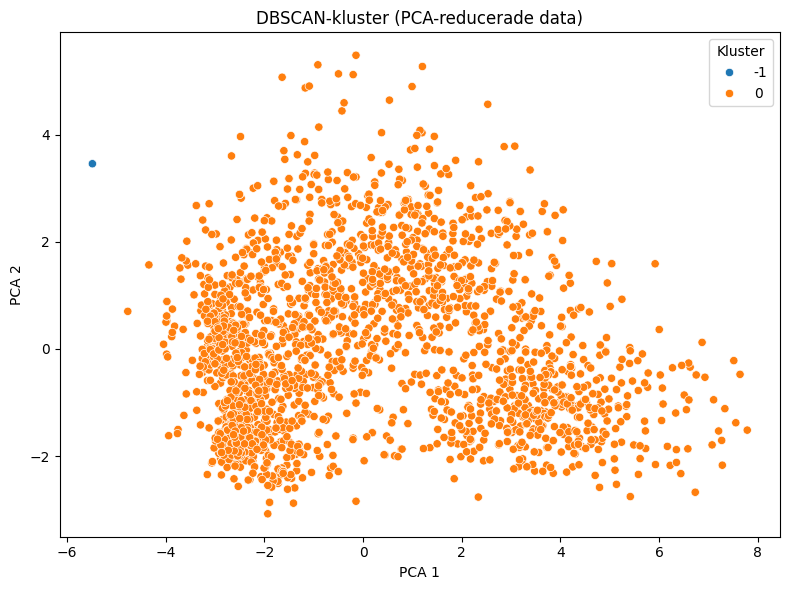

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rita scatterplot av DBSCAN-kluster
plt.figure(figsize=(8, 6))
palette = sns.color_palette("tab10", len(set(dbscan_clusters)))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=dbscan_clusters,
    palette=palette,
    legend="full"
)
plt.title("DBSCAN-kluster (PCA-reducerade data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Kluster")
plt.tight_layout()
plt.show()

## 🧩 Slutsats: Kombination av KMeans och DBSCAN

För att utforska strukturen i kunddatan testade vi två olika metoder inom unsupervised learning:

### 🎯 KMeans:
- Identifierade **tre tydliga kundkluster**
- Varje kluster visade olika konsumtionsmönster och demografiska profiler
- Detta ger konkreta segment att rikta kampanjer eller erbjudanden mot

### 🔍 DBSCAN:
- Hittade **ett huvudkluster** och några få **avvikande datapunkter**
- Avvikarna kan indikera unika kunder – t.ex. högkonsumenter, inaktiva eller ovanliga beteenden
- DBSCAN kompletterar KMeans genom att belysa *bruset* som KMeans ignorerar

### 💡 Affärsvärde:
Att kombinera flera klustringsmetoder ger en djupare förståelse av kundbasen:
- **KMeans** för stabil segmentering och målgruppsanalys
- **DBSCAN** för att hitta utstickare som kan kräva särskild uppmärksamhet (t.ex. VIP-erbjudanden eller återaktiveringskampanjer)

Tillsammans stärker de beslutsunderlaget för mer datadrivna och individanpassade marknadsstrategier.


## Visa kampanjrespons per kluster: Slutsatser och Affärsrekommendationer


In [60]:
df.groupby("cluster")[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].mean()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
cluster,,,,,,
0,0.000970,0.001940,0.071775,0.009699,0.000000,0.086324
1,0.218412,0.034296,0.086643,0.129964,0.274368,0.299639
2,0.031696,0.014263,0.064976,0.129952,0.015848,0.123613


🚀 Topp 3 affärsinsikter
Premiumkluster (Kluster 1) – Karaktäriseras av hög inkomst, många inköp och stark respons på kampanjer. Rekommenderas som målgrupp för lojalitetsprogram, exklusiva erbjudanden och merförsäljningsstrategier.

Familjekluster (Kluster 0) – Har generellt lägre köpkraft, fler barn och svag kampanjrespons. En lågprisstrategi kan vara effektiv, men gruppen kan också prioriteras lägre i vissa kampanjer.

DBSCAN-outliers – En liten grupp kunder som uppvisar avvikande beteende. Dessa kan vara potentiella VIP-kunder eller specialfall som kräver en individanpassad marknadsföringsstrategi.

## 🔬 Reflektion: Behövs statistiska tester i detta fall?

I traditionell hypotesprövning används ofta statistiska tester som:
- **t-test** – för att jämföra medelvärden mellan två grupper
- **ANOVA** – för att jämföra fler än två grupper
- **Chi2-test** – för kategoriska variabler

### ❓ Varför används de inte här?

I det här projektet arbetar vi med **unsupervised learning**, där vi **inte har fördefinierade grupper** (etiketter) utan låter algoritmerna själva identifiera kluster i datan (t.ex. KMeans och DBSCAN).

Eftersom klustren redan skapas **baserat på skillnader i data**, är det inte relevant att testa om de "skiljer sig signifikant" – det är själva poängen med klustringen.

### ✅ Alternativa sätt att utvärdera klustren:
- **Silhouette Score** för att mäta hur väl klustren separeras
- **Beskrivande statistik** (medelvärde per kluster)
- **Visualiseringar** (scatterplots, boxplots, heatmaps)

Dessa metoder räcker för att tolka och förstå resultaten inom ramen för unsupervised learning.

📌 **Slutsats:**  
Statistiska tester som t-test eller ANOVA är inte nödvändiga i denna analys eftersom vi arbetar med kluster som redan konstruerats utifrån mönster i datan. Fokus ligger istället på **tolkning, affärsvärde och mönsterigenkänning**.
